# Introduction to Data Science 2025

# Week 3

## Exercise 1 | Working with geospatial data (GIS)

To get at least a bit familiar with [GIS](https://en.wikipedia.org/wiki/Geographic_information_system) data and the concept of map projections, we’ll do a simple task of plotting two data sets that are given in different coordinate systems.

1. Download the [world_m.zip](https://github.com/HY-TKTL/intro-to-data-science-2017/blob/master/world_m.zip) and [cities.zip](https://github.com/HY-TKTL/intro-to-data-science-2017/blob/master/cities.zip) files that each include a set of GIS files. Most notably, the <span style="font-weight: bold">shp</span> files are [Shapefile-files](https://en.wikipedia.org/wiki/Shapefile) with coordinates (don’t look, it’s binary!). The <span style="font-weight: bold">prj</span> files contain information (in plain text, so okay to look) about the coordinate systems. Open the files using your favorite programming environment and packages.  

    <span style="font-weight: 500"> *Hint: We warmly recommend [Geopandas](http://geopandas.org/) for pythonistas.*</span>

In [2]:
# Use this cell for your code
import geopandas 
world_m_data= geopandas.read_file('world_m')
cities_data=geopandas.read_file('cities')
print("checking world data:\n\n",world_m_data.head())
print("checking cities data:\n\n",cities_data.head())


checking world data:

       pop_est      continent                  name iso_a3  gdp_md_est  \
0  28400000.0           Asia           Afghanistan    AFG     22270.0   
1  12799293.0         Africa                Angola    AGO    110300.0   
2   3639453.0         Europe               Albania    ALB     21810.0   
3   4798491.0           Asia  United Arab Emirates    ARE    184300.0   
4  40913584.0  South America             Argentina    ARG    573900.0   

   gdp_per_ca                                           geometry  
0    0.000784  POLYGON ((6813956.99 4227673.562, 6927484.435 ...  
1    0.008618  MULTIPOLYGON (((1817460.823 -651055.118, 18449...  
2    0.005993  POLYGON ((2292095.859 5110825.73, 2277950.23 5...  
3    0.038408  POLYGON ((5741805.754 2765811.385, 5761611.935...  
4    0.014027  MULTIPOLYGON (((-7291426.647 -7365665.131, -73...  
checking cities data:

            name                   geometry
0  Vatican City  POINT (12.45339 41.90328)
1    San Marino   POINT (1

2. The <span style="font-weight: bold">world_m</span> file contains borders of almost all countries in the world. Plot the world.

<Axes: >

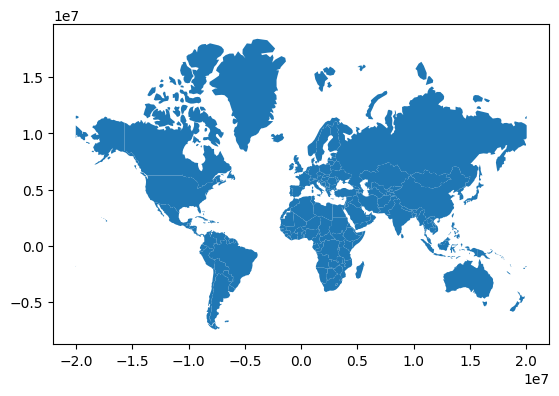

In [3]:
# Use this cell for your code
world_m_data.plot()

3. On top of the countries that you just plotted, plot another layer of information, namely the capital cities of each country from the <span style="font-weight: bold">cities</span> dataset. However, depending on how clever your programming environment is, the cities will probably all appear to be in the Gulf of Guinea, near the coordinates (0°, 0°).

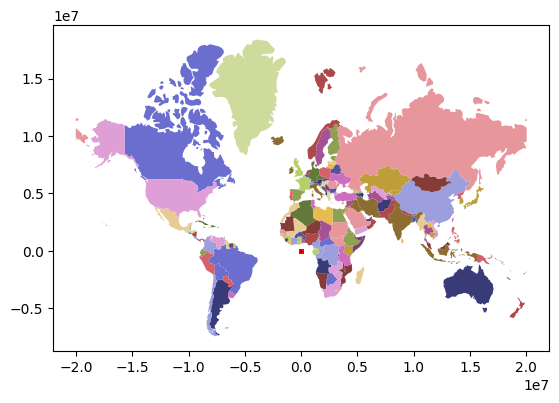

In [4]:
base = world_m_data.plot(cmap="tab20b")

cities_ax=cities_data.plot(ax=base, marker='o', color='black',edgecolor='red', markersize=6)

4. Perform a map projection to bring the two data-sets into a shared coordinate system. (You can choose which one.) Now plot the two layers together to make sure the capital cities are where they are supposed to be.

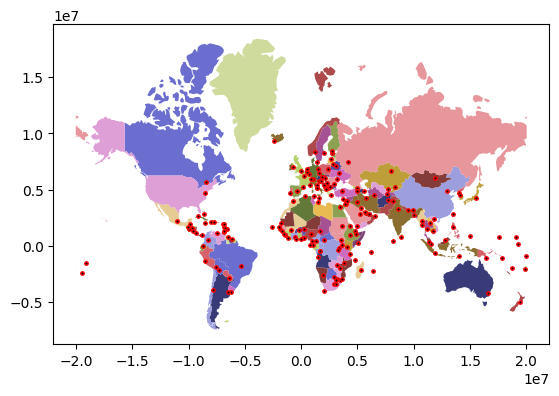

In [5]:
# Use this cell for your code
cities_reprojected=cities_data.to_crs(world_m_data.crs)
base = world_m_data.plot(cmap="tab20b")

cities_ax=cities_reprojected.plot(ax=base, marker='o', color='black',edgecolor='red', markersize=6)


**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Symbol classification

We’ll be looking into machine learning by checking out the [HASYv2](https://zenodo.org/record/259444#.Wb7efZ8xDhZ) dataset that contains hand written mathematical symbols as images. The whole dataset is quite big, so we’ll restrict ourselves to doing 10-class classification on some of the symbols. Download the data and complete the following tasks.

1. Extract the data and find inside a file called <span style="font-weight: bold">hasy-data-labels.csv</span>. This file contains the labels for each of the images in the <span style="font-weight: bold">hasy_data</span> folder. Read the labels in and only keep the rows where the <span style="font-weight: bold">symbol_id</span> is within the inclusive range <span style="font-weight: bold">[70, 79]</span>. Read the corresponding images as black-and-white images and flatten them so that each image is a single vector of shape <span style="font-weight: bold">32x32 = 1024</span>. Your dataset should now consist of your input data of shape <span style="font-weight: bold">(1020, 1024)</span> and your labels of shape <span style="font-weight: bold">(1020, )</span>. That is, a matrix of shape <span style="font-weight: bold">1020 x 1024</span> and a vector of size <span style="font-weight: bold">1020</span>.

In [6]:
# Use this cell for your code
import pandas as pd
import numpy as np
from PIL import Image
import os
df = pd.read_csv('HASYv2/hasy-data-labels.csv')
#print("before dropping: ",df.shape)
labels= df.drop(df[(df['symbol_id'] <  70) | (df['symbol_id'] > 79)].index)
print("after dropping: ",labels.shape)
labels.info()
#readig images
images=[Image.open(f"HASYv2/{label}").convert("L").resize((32,32)) for label in labels['path'] if os.path.exists(f"HASYv2/{label}")]
#flattening
X=np.array([np.array(img).flatten() for img in images])
y = labels['symbol_id'].values
print("matrix shape: ",X.shape)
print("vector shape:",y.shape)


after dropping:  (1020, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 345 to 20827
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   path       1020 non-null   object
 1   symbol_id  1020 non-null   int64 
 2   latex      1020 non-null   object
 3   user_id    1020 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 39.8+ KB
matrix shape:  (1020, 1024)
vector shape: (1020,)


2. Randomly shuffle the data, and then split it into training and test sets, using the first 80% of the data for training and the rest for evaluation.

In [7]:
# Use this cell for your code
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("training set: X: ",X_train.shape,"y: ",y_train.shape)
print("Test set: X: ",X_test.shape,"y: ", y_test.shape)


training set: X:  (816, 1024) y:  (816,)
Test set: X:  (204, 1024) y:  (204,)


3. Fit a logistic regression classifier on the data. Note that we have a multi-class classification problem, but logistic regression is a binary classifier. For this reason, you will find useful <span style="font-weight: bold">[Sklearn's "multi_class" attribute](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)</span>. Use a multinomial loss and the softmax function to predict the probability of each class as the outcome.  The classifier should select the class with the highest probability. Most library implementations will do this for you - feel free to use one.

In [8]:
# Use this cell for your code
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=0, max_iter=1000, multi_class='multinomial').fit(X_train, y_train)
print("Predict the class of the first instance = ", clf.predict(X_test[:1, :]))

print("Predict probability distribution over the classes, for the first instance = ",clf.predict_proba(X_test[:1, :]))
print("test Accuracy = ", clf.score(X_test, y_test))
print("training Accuracy = ", clf.score(X_train, y_train))



Predict the class of the first instance =  [77]
Predict probability distribution over the classes, for the first instance =  [[1.22021628e-12 3.17327535e-06 3.21676578e-04 1.06468540e-05
  4.38634752e-12 3.79132191e-11 3.40460972e-11 9.99664503e-01
  4.05796943e-19 8.27399916e-13]]
test Accuracy =  0.8480392156862745
training Accuracy =  1.0


/Users/nawara/Documents/exchange/introDS/exercises/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


4. In order to evaluate the model, let’s create our own dummy classifier that simply guesses the most common class in the training set (looking at the test set here would be cheating!). Then, evaluate your logistic regression model on the test data, and compare it to the majority class classifier. The logistic regression model should have significantly better accuracy as the dummy model is merely making a guess.

    <span style="font-weight: 500"> *Hint: Sklearn's DummyClassifier( ) might save you a bit of time.*</span>

In [9]:
# Use this cell for your code
from sklearn.dummy import DummyClassifier
#dummy classifiers, then predictions with both then compare accuracies,
dummy_clf=DummyClassifier(strategy="most_frequent",random_state=0)
dummy_clf.fit(X_train, y_train)

dummy_predict=dummy_clf.predict(X_test)
logistic_predict = clf.predict(X_test)
 #accurcies:
dummy_accuracy = dummy_clf.score(X_test, y_test)
logistic_accuracy = clf.score(X_test, y_test)


print("dummy classifier most freq class accuracy: ",dummy_accuracy)
print("logistic regression accuracy: ",logistic_accuracy)

most_common_class = dummy_clf.predict([X_test[0]])[0]

print("most common class for dummy classifeir: ",most_common_class)
#so only 0.07 of test samples are actually class


dummy classifier most freq class accuracy:  0.13725490196078433
logistic regression accuracy:  0.8480392156862745
most common class for dummy classifeir:  70


5. Plot some of the images that the logistic classifier misclassified. Can you think of an explanation why they were misclassified? Would you have gotten them right?
    
    <span style="font-weight: 500">*Hint: Matplotlib has a [function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) that can help you with plotting.*</span>

Here are some examples of the syntax used to fit a logistic regression classifier (using Sklearn or statsmodel with Python, or GLM with R):

In [129]:
#Sklearn (python)

#from sklearn.linear_model import LogisticRegression

#Fit on the training data set, with:
#X : {array-like, sparse matrix}, shape (n_samples, n_features) , n_samples rows x n_features columns
#with attributes that describe each sample.
#y : array-like, shape (n_samples,) , n_samples target values for each sample.

#model = LogisticRegression()
#model.fit(X, y)

In [128]:
#Statsmodels (python)

#import statsmodels.api as sm
#model = sm.Logit(y, X)

In [127]:
#GLM (R)

#model <- glm(y ~.,family=binomial(link='logit'), data=X)

nbr of misclassified images:  31


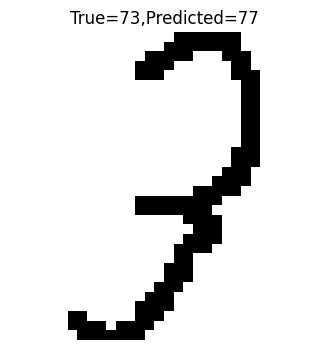

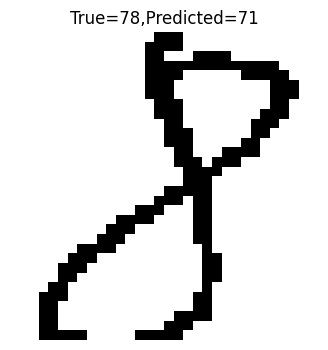

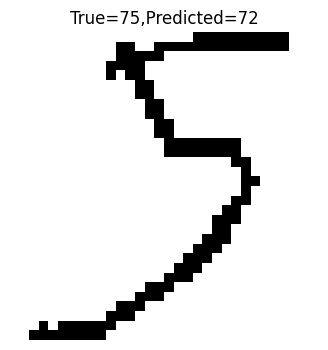

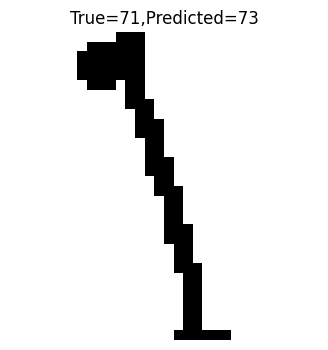

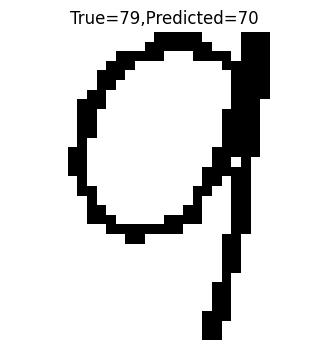

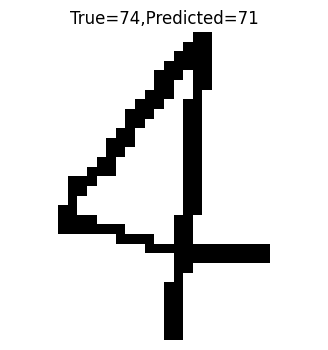

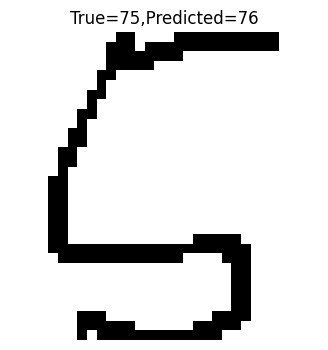

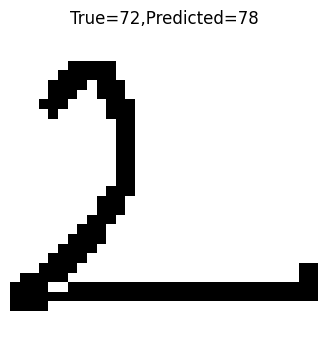

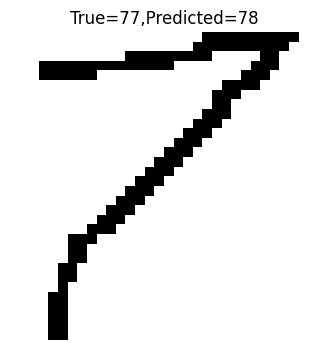

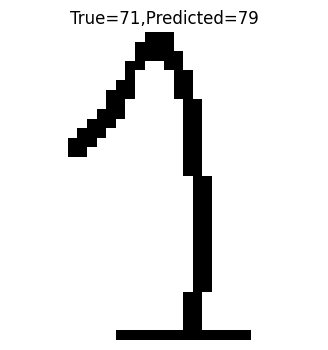

In [11]:
# Use this cell for your code
import matplotlib.pyplot as plt 

misclassified=np.where(logistic_predict != y_test)[0]
print("nbr of misclassified images: ",len(misclassified))

for i in range(10):
    if i <len(misclassified):
        index=misclassified[i]
        image = X_test[index].reshape(32, 32)       
        plt.figure(figsize=(4, 4))
        plt.imshow(image,cmap='gray')
        plt.title(f'True={y_test[index]},Predicted={logistic_predict[index]}')
        plt.axis('off')
        plt.show()

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**